In [33]:
import os
import pickle # for loading the data
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

### Getting the data

1. Download dataset from http://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz

2. Extract it to the same directory as the present file

In [22]:
# Must contain cifar-10-batches-py
working_dir = os.getcwd()
files_list = os.listdir()
assert "cifar-10-batches-py" in files_list, f"CIFAR-10 data not in {working_dir} list of files: {files_list}"

### Data Format

Each of the batch files contains the following elements:

- data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.
- labels -- a list of 10000 numbers in the range 0-9. The number at index i indicated hte label of the ith image in the array data

Tha dataset contains another file, called batches.meta. It too contains a Python dictionary object. It has the following entries.

- label_names -- a 10-element list which gives meaningful names to the numeric labels in the labels array described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc

### Loading the data

In [23]:
# from http://www.cs.toronto.edu/~kriz/cifar.html
def unpickle(file):
    with open(file, 'rb') as f:
        file_dict = pickle.load(f, encoding='bytes')
    return file_dict

In [24]:
batch1 = unpickle('cifar-10-batches-py/data_batch_1')
batch1.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

### Formatting the data

- [?] - Should I format it like 10000, 3, 32, 32 or like 10000, 32, 32, 3

```
arr = ['red', 'red', 'red', 'red', 'green', 'green', 'green', 'green', 'blue', 'blue', 'blue', 'blue' ]
arr = np.r_[arr, arr] 
arr.reshape(2, 3, 2, 2)[0][0]
```

In [69]:
# Index 0: Image Index
# Index 1: Image Layer - RGB
# Index 2: Image X Axis?
# Index 3: Image Y Axis?
batch1_fmt = batch1[b'data'].reshape(10000, 3, 32, 32)

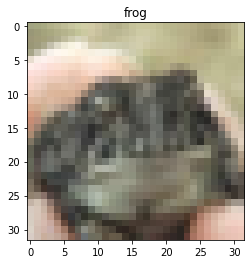

In [108]:
image_index = 2349909
image = batch1_fmt[image_index]
new_image = np.zeros(32*32*3).reshape(32, 32, 3)
for i in range(3):
    for j in range(32):
        for k in range(32):
            new_image[j, k, i] = image[i, j, k]
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.title(classes[int(batch1[b'labels'][image_index])])
plt.imshow(new_image.astype('uint8'))
plt.show()